<a href="https://colab.research.google.com/github/MasonG702/1221-Dark-Matter/blob/main/astro1221_01_09_23_rotation_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
import astropy.io.ascii

In [ ]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

(0.0, 300.0)

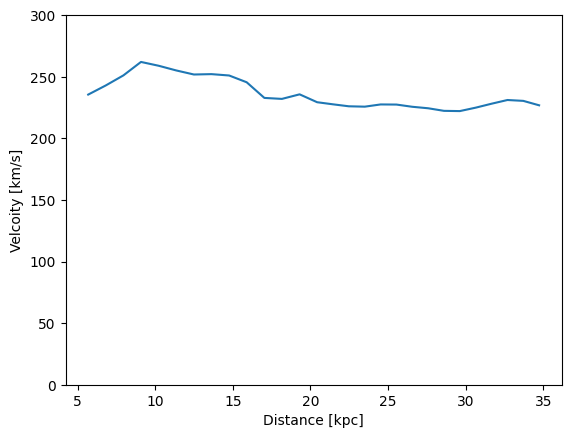

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis,vel)
plt.xlabel("Distance [kpc]")
plt.ylabel("Velcoity [km/s]")
plt.ylim(0, 300)

In [ ]:
def calculate_orbital_velocity(mass, radius):
  return(np.sqrt(ac.G*mass/radius))

In [ ]:
mass = 1 * u.earthMass
radius = 1 * u.earthRad
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km/u.s))

7.905388234385281 km / s


In [ ]:
mass = 3e7 * u.solMass
radius = 5.68 * 1000 * u.parsec
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km/u.s))

4.766142291386287 km / s


In [ ]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_bh[i] = orb_vel
  print("The orbital velocity at ", radius, " kpc is ", orb_vel.to(u.km/u.s))

The orbital velocity at  5.68  kpc is  4.766142291386287 km / s
The orbital velocity at  6.81  kpc is  4.352789004155528 km / s
The orbital velocity at  7.95  kpc is  4.028632086788635 km / s
The orbital velocity at  9.08  kpc is  3.7696258549122557 km / s
The orbital velocity at  10.22  kpc is  3.5531678501224344 km / s
The orbital velocity at  11.35  kpc is  3.3716558645298256 km / s
The orbital velocity at  12.49  kpc is  3.214104201911268 km / s
The orbital velocity at  13.62  kpc is  3.077886621912613 km / s
The orbital velocity at  14.76  kpc is  2.956636901678396 km / s
The orbital velocity at  15.89  kpc is  2.8495692993877366 km / s
The orbital velocity at  17.03  kpc is  2.7525413240352865 km / s
The orbital velocity at  18.16  kpc is  2.6655280045445924 km / s
The orbital velocity at  19.3  kpc is  2.585607014258112 km / s
The orbital velocity at  20.43  kpc is  2.513083903274837 km / s
The orbital velocity at  21.45  kpc is  2.4526045154369367 km / s
The orbital velocity at

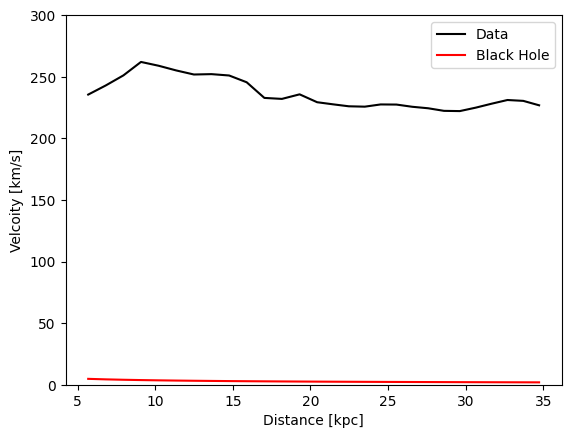

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis,vel, color="black", label="Data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velcoity [km/s]")
plt.ylim(0, 300)
plt.legend()

In [ ]:
mass_bulge = 3e10 * u.solMass
radius_bulge = 3e3 * u.parsec
density_bulge = mass_bulge / (4 * np.pi / 3 * radius_bulge**3)
print(density_bulge.to(u.solMass / u.parsec**3))

0.26525823848649227 solMass / pc3


In [ ]:

def calc_bulge_mass(density, radius):
  if radius < (2e3 * u.parsec):
    volume = 4 * np.pi / 3 * (radius)**3
    bulge_mass = density * volume
  else:
    bulge_mass = mass_bulge
  return(bulge_mass)


In [ ]:


def calc_rotational_velocity(central_mass, radius):
  rotation_velocity = (np.sqrt(ac.G * central_mass / (radius)))
  return(rotation_velocity.si)


central_black_hole_mass = 4e6 * u.solMass
radius_arr = np.array(tab["col2"].data) * 1000 * u.parsec
rotational_velocity_arr = (calc_rotational_velocity(central_black_hole_mass, radius_arr))
bulge_mass_arr = np.zeros(np.shape(radius_arr)) * u.solMass
for i, radius in enumerate(radius_arr):
  bulge_mass_arr[i] = calc_bulge_mass(density_bulge, radius_arr[i])
rotational_velocity_bulge_arr = (calc_rotational_velocity(bulge_mass_arr, radius_arr))



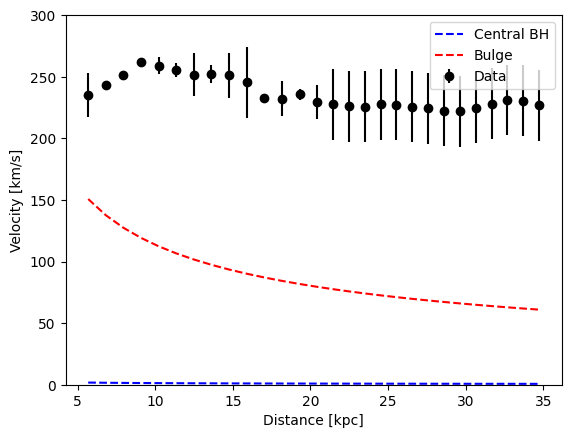

In [ ]:


plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed", label="Central BH")
plt.plot(radius_arr.value / 1e3, rotational_velocity_bulge_arr.to(u.km / u.s).value, color="red", linestyle="dashed", label="Bulge")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()



In [ ]:
mass_disk = 10e10 * u.solMass
size_disk = 30 * 1000 * u.parsec
rho_disk = mass_disk / (np.pi * size_disk**2)
print(rho_disk.to(u.solMass / u.parsec**2))

35.367765131532295 solMass / pc2


In [ ]:
def calc_mass_disk(density, radius):
  area = np.pi * (radius)**2
  disk_mass = density * area
  return(disk_mass)

disk_mass_arr = calc_mass_disk(rho_disk , radius_arr)
rotational_velocity_disk_arr = (calc_rotational_velocity(disk_mass_arr, radius_arr))

In [ ]:
vel_disk = np.zeros(np.shape(dis)) * u.km / u.s

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec # what is the difference between rad and radius?
  mass = rho_disk * rad**2
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_disk[i] = orb_vel

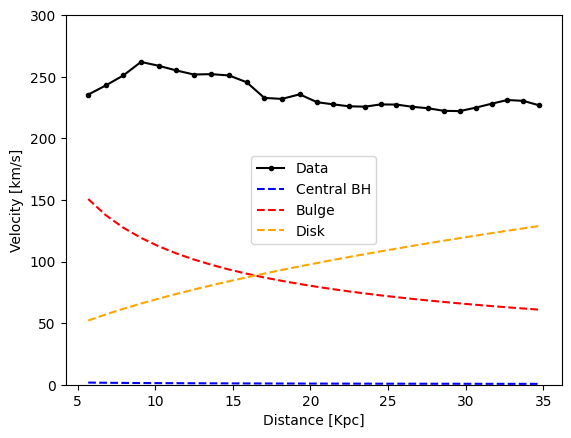

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data", marker=".")
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed", label="Central BH")
plt.plot(radius_arr.value / 1e3, rotational_velocity_bulge_arr.to(u.km / u.s).value, color="red", linestyle="dashed", label="Bulge")
plt.plot(radius_arr.value / 1e3, rotational_velocity_disk_arr.to(u.km / u.s).value, color="orange", linestyle="dashed", label="Disk")

plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()
